In [2]:
!pip install nglview

     ---------------------------------------- 0.0/5.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.5 MB 660.6 kB/s eta 0:00:09
      --------------------------------------- 0.1/5.5 MB 1.3 MB/s eta 0:00:05
     -- ------------------------------------- 0.3/5.5 MB 2.1 MB/s eta 0:00:03
     --- ------------------------------------ 0.4/5.5 MB 2.8 MB/s eta 0:00:02
     ---- ----------------------------------- 0.6/5.5 MB 2.7 MB/s eta 0:00:02
     ---- ----------------------------------- 0.7/5.5 MB 2.6 MB/s eta 0:00:02
     ----- ---------------------------------- 0.8/5.5 MB 2.7 MB/s eta 0:00:02
     ------ --------------------------------- 0.8/5.5 MB 2.6 MB/s eta 0:00:02
     ------- -------------------------------- 1.0/5.5 MB 2.9 MB/s eta 0:00:02
     ------- -------------------------------- 1.1/5.5 MB 2.7 MB/s eta 0:00:02
     --------- ------------------------------ 1.3/5.5 MB 2.8 MB/s eta 0:00:02
     ---------- ----------------------------- 1.4/5.5 MB 2.8 MB/s eta

In [6]:
import Bio
import pylab
import urllib
import pandas as pd
import nglview as nv

In [7]:
from Bio.Seq import Seq
from Bio.Blast import NCBIWWW
from collections import Counter
from Bio.Data import CodonTable
from Bio import SeqIO, SearchIO
from Bio.PDB import PDBParser,MMCIFParser
from Bio.SeqUtils import molecular_weight

### Attribute of Biopython

In [8]:
# check the attribute of Biopython
dir(Bio)

['Align',
 'BiopythonDeprecationWarning',
 'BiopythonExperimentalWarning',
 'BiopythonParserWarning',
 'BiopythonWarning',
 'Blast',
 'Data',
 'File',
 'GenBank',
 'MissingExternalDependencyError',
 'MissingPythonDependencyError',
 'PDB',
 'SVDSuperimposer',
 'SearchIO',
 'Seq',
 'SeqFeature',
 'SeqIO',
 'SeqRecord',
 'SeqUtils',
 'Sequencing',
 'StreamModeError',
 'SwissProt',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_parent_dir',
 '_utils',
 'os',
 'warnings']

In [10]:
from Bio import SeqIO

file_path = "C:/Users/Uzma/j/AMII/10. 3D SARS-CoV-19 Protein Visualization With Biopython/sequence (1).fasta"
records = list(SeqIO.parse(file_path, "fasta"))
if records:
    first_record = records[0]  # Accessing the first record if exists
    print(first_record.id)
    print(first_record.seq)
else:
    print("No records found in the file.")

MN908947.3
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACA

In [11]:
# read fasta file
seq_file_read=SeqIO.read("C:/Users/Uzma/j/AMII/10. 3D SARS-CoV-19 Protein Visualization With Biopython/sequence (1).fasta", format="fasta")
seq_file_read

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947.3', description='MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [12]:
type(seq_file_read) # is a sequence record, and not a string

Bio.SeqRecord.SeqRecord

In [13]:
seq_file_read.id  # id of the sequence

'MN908947.3'

In [14]:
# string of the sequence
seq_file_read.seq

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [15]:
seqfromfile=seq_file_read.seq

In [16]:
# content of fasta file
records = SeqIO.parse("C:/Users/Uzma/j/AMII/10. 3D SARS-CoV-19 Protein Visualization With Biopython/sequence (1).fasta", format="fasta")
for record in records:
    print(record)  # or any other operation on the record

ID: MN908947.3
Name: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


In [17]:
seqfromfile=record.seq
seqfromfile

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [18]:
len(seqfromfile)

29903

In [19]:
#molecular weight
molecular_weight(seqfromfile)

9241219.214400413

## Sequence manipulation

In [20]:
seqfromfile[0:4]

Seq('ATTA')

In [21]:
seqfromfile[0:3]+seqfromfile[-3:] #concatination

Seq('ATTAAA')

In [22]:
concat= seqfromfile[0:6]+seqfromfile[-5:]
concat

Seq('ATTAAAAAAAA')

In [23]:
seqfromfile.find('AGA')

54

In [24]:
# GC content
(seqfromfile.count("G")+seqfromfile.count("C"))/(len(seqfromfile))*100

37.97277865097147

In [25]:
import Bio
print(Bio.__version__)

1.83


In [26]:
import Bio.SeqUtils
# help(Bio.SeqUtils)

In [27]:
from Bio.SeqUtils import gc_fraction

In [28]:
gc_content = gc_fraction(seqfromfile)
gc_content

0.3797277865097147

In [29]:
print(f"The GC content of the sequence is: {gc_content:.2%}")

The GC content of the sequence is: 37.97%


In [30]:
#complement
seqfromfile[:11].complement()

Seq('TAATTTCCAAA')

In [31]:
# reverse complement
seqfromfile[:11].reverse_complement()


Seq('AAACCTTTAAT')

In [32]:
seqfromfile[-10:].reverse_complement()

Seq('TTTTTTTTTT')

## Transcription and Translation studies

In [67]:
# DNA > RNA =Transcription

In [68]:
# mRNA > amino acid (protein)= Translation

In [35]:
#Transcription
mRNA=seqfromfile.transcribe()
mRNA[:10]       #all T has been replaced by U

Seq('AUUAAAGGUU')

In [36]:
# back transcribe
mRNA.back_transcribe() # all U has been changed to T

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

## Translation

In [37]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [38]:
protein_seq=seqfromfile.translate()
protein_seq[:10]

D:\Anaconda\k\Lib\site-packages\Bio\Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*Q')

In [39]:
# number of amino acids present in our protein
len(protein_seq) # number has decreased by 1/3rd

9967

In [40]:
len(seqfromfile)

29903

### Can protein sequences be revered translated?

In [41]:
protein_seq.back_transcribe()

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [42]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [43]:
# Listing the most common amino acids
common_amino=Counter(protein_seq)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

Text(0, 0.5, 'frequency')

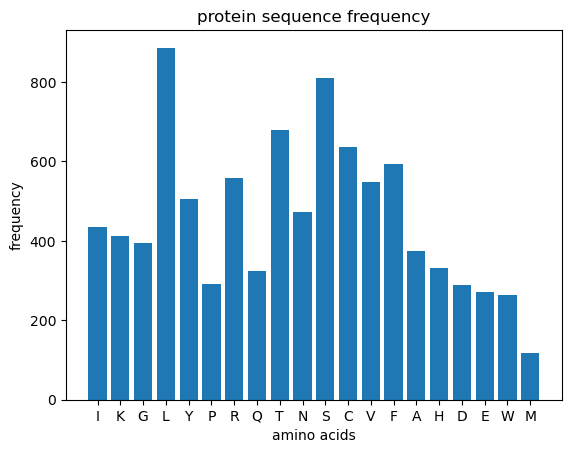

In [44]:
# visualize all 20 amino acid occurrences in the form of a histogram
del common_amino['*']

pylab.bar(common_amino.keys(), common_amino.values())

pylab.title("protein sequence frequency")
pylab.xlabel("amino acids")
pylab.ylabel("frequency")


In [45]:
protein_list=[str(i) for i in protein_seq.split('*')]
protein_list[:10]  # list of protein sequences

['IKGLYLPR',
 'QTNQLSISCRSVL',
 'TNFKICVAVTRLHA',
 'CTHAV',
 'LITNYCR',
 'QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER',
 'DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS',
 'RWHLWLSRS',
 'KRRFAST',
 'TALCVHQTFGCSNCTSWSCYG']

In [46]:
# convert sequences to dataframe
large_proteins=[x for x in protein_list if len(x)>10]
df=pd.DataFrame({'protein_seq':large_proteins})

In [47]:
df['length']=df['protein_seq'].apply(len)
df.head()

,protein_seq,length
0,QTNQLSISCRSVL,13
1,TNFKICVAVTRLHA,14
2,QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER,35
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
4,TALCVHQTFGCSNCTSWSCYG,21


In [48]:
# sort sequence data
df.sort_values(by=['length'], ascending=False)[:10]

,protein_seq,length
118,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
157,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
168,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
158,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
167,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
93,TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV,46
188,KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM,43
116,DVVYTHWYWSGNNSYTGSQYGSRILWWCIVLSVLPLPHRSSKS,43
182,LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG,43


In [49]:
# store the largest protein in a different table
one_large_protein=df.nlargest(1, 'length')
single_prot=one_large_protein.iloc[0,0]
single_prot

'CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACIRRPFLCCKCCYDHVISTSHKLVLSVNPYVCNAPGCDVTDVTQLYLGGMSY

In [50]:
# save thi sprotein
with open("C:/Users/Uzma/j/AMII/10. 3D SARS-CoV-19 Protein Visualization With Biopython/single_prot.fasta", "w") as file:
    file.write(">large protein\n" + single_prot)

## Perform Basic Local Alignment using NCBI-BLAST

BLAST aligns that qery biological sequence with a sequence deposited by other researchers into the NCBI database.

In [51]:
# read single_seq fasta file

read = SeqIO.read("C:/Users/Uzma/j/AMII/10. 3D SARS-CoV-19 Protein Visualization With Biopython/single_prot.fasta", format="fasta")
read.seq

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [52]:
%%time
result_handle=NCBIWWW.qblast("blastp", "pdb", read.seq)
blast_qresult=SearchIO.read(result_handle, "blast-xml")

CPU times: total: 250 ms
Wall time: 4min 1s


In [53]:
print(blast_qresult[0:5])

Program: blastp (2.15.0+)
  Query: unnamed (2701)
         protein product
 Target: pdb
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  pdb|7D4F|A  Chain A, RNA-directed RNA polymerase [Sever...
            1      1  pdb|6YYT|A  Chain A, nsp12 [Severe acute respiratory sy...
            2      1  pdb|6XEZ|A  Chain A, RNA-directed RNA polymerase [Sever...
            3      1  pdb|7BW4|A  Chain A, RNA-directed RNA polymerase [Sever...
            4      1  pdb|6XQB|A  Chain A, RNA-directed RNA polymerase [Sever...


In [54]:
seqid=blast_qresult[0]
details=seqid[0]

print(f"\
Sequence ID:{seqid.id}\n\
description:{seqid.description}\n\
E value:   {details.evalue} \n\
bit Score:   {details.bitscore}\n\
")



Sequence ID:pdb|7D4F|A
description:Chain A, RNA-directed RNA polymerase [Severe acute respiratory syndrome coronavirus 2]
E value:   0.0 
bit Score:   1938.7



## Reading PDB file

In [55]:
seqid.id

'pdb|7D4F|A'

In [56]:
seqid.id.split('|')[1]

'7D4F'

In [57]:
urllib.request.urlretrieve('http://files.rcsb.org/download/7D4F.pdb', 'C:/Users/Uzma/j/AMII/10. 3D SARS-CoV-19 Protein Visualization With Biopython/7D4F.pdb')

('C:/Users/Uzma/j/AMII/10. 3D SARS-CoV-19 Protein Visualization With Biopython/7D4F.pdb',
 <http.client.HTTPMessage at 0x1304fc2a250>)

In [58]:
# read pdb file
parser=PDBParser()
structure=parser.get_structure('7D4F', 'C:/Users/Uzma/j/AMII/10. 3D SARS-CoV-19 Protein Visualization With Biopython/7D4F.pdb')
structure

<Structure id=7D4F>

In [59]:
for chain in structure[0]:
    print(f"chain ID: {chain.id}") # This protein has 4 chains

chain ID: B
chain ID: C
chain ID: G
chain ID: A


In [60]:
# Visualizing SARS protein structure

In [61]:
import nglview as nv

In [62]:
nv.demo()

NGLWidget()

In [63]:
view=nv.show_biopython(structure)
view

NGLWidget()

In [65]:
view.render_image()

Image(value=b'', width='99%')

In [66]:
nv.show_biopython(structure, gui=True)

NGLWidget()